# Домашнее задание 2: Pandas и простые визуализации

В данном домашнем задании очень важно **внимательно** читать формулировку задания и все комментарии.

1. С помощью Pandas вызовом одной функции считайте набор данных из файла  'supermarket_sales.csv' , который лежит в папке `data`.

In [1287]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import colors
df = pd.read_csv('supermarket_sales.csv')

2. Покажите первые 5 и последние 5 записей в наборе данных.

In [1288]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [1289]:
df.tail(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


3. Выведите названия колонок в наборе данных вместе с их типами данных.

In [1290]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

4. Сколько колонок имеют текстовый тип данных? Сколько колонок содержат числа (тип данных float/int)? Ответ нужно вывести с помощью использования функций Pandas. Ответ должен быть в формате: тип - количество таких колонок. Правильным выполнением будет в том числе, если две отдельные строки ответа будут содержать количество колонок типа float и количество колонок типа int.

In [1291]:
df.dtypes.value_counts()

object     9
float64    7
int64      1
dtype: int64

или

In [1292]:
df.info(verbose = False, memory_usage = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 17 entries, Invoice ID to Rating
dtypes: float64(7), int64(1), object(9)

9 колонок имеют текстовый тип данных , 7 - тип float, 1 - тип int

5. Сколько всего покупок сделали мужчины, а сколько женщины? Ответ должен быть сгенерирован одной строчкой кода и содержаться в одной pd.Series. Вывести отдельно количество покупок мужчин и количество покупок женщин будет в данном задании ошибкой.
Подсказка: можно выполнить задание используя метод value_counts(), а можно - используя метод groupby()

In [1293]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [1294]:
#df.groupby('Gender')['Quantity'].sum()

In [1295]:
df.groupby('Gender')['Invoice ID'].nunique()

Gender
Female    501
Male      499
Name: Invoice ID, dtype: int64

6. Какие есть продуктовые линии в наборе данных? Вывести уникальные названия.

In [1296]:
print(df['Product line'].unique())

['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


7. Какая средняя цена товара в каждой продуктовой линии? Сгенерировать ответ одной строчкой кода.  
Цена товара содержится в колонке `'Unit price'`

In [1297]:
df.groupby('Product line')['Unit price'].mean()

Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64

8. Преобразуйте колонку Date в формат datetime.

In [1298]:
df['Date'] = pd.to_datetime(df['Date'])

9. C помощью команды plot() выведите линейный график сумы всех покупок за каждый день, что есть в наборе данных. Задайте линии зелёный цвет.   
В данном задании надо просуммировать значения колонки Total по дням и вывести на графике. Не забудьте подписать оси и дать графику название (`title`). К примеру, по оси ОУ у нас будет название 'Total amount', а заголовок графика 'Daily total samount of sales'. Но можете придумать и свои названия :)  
Задание можно (но не обязательно) выполнить одной строкой кода пользуясь только методами pandas.

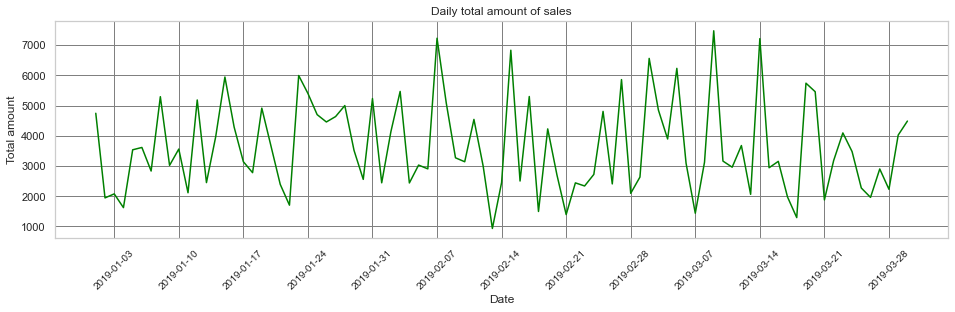

In [1299]:
fig, ax = plt.subplots()
ax.set_title('Daily total amount of sales')
ax.set_ylabel('Total amount')
ax.set_xlabel('Date')
ax.plot(df.groupby('Date')['Total'].sum(), color = 'green')
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.tick_params(axis = 'x',    
               labelsize = 10,  
               labelrotation = 45)   
ax.grid(which='major',
        color = 'grey')
fig.set_figwidth(16)
plt.show()

10. А теперь выведите на линейном графике подневно сколько продаж было сделано в каждой ветке (`Branch`). Задайте размер фигуры (10,6).
Должны быть три линии (по одной на ветвь) на одном графике.
Количеством продаж считаем количество `Invoice ID` в этот день.

Задание можно (но не обязательно) выполнить одной строкой кода пользуясь только методами pandas.  
Один из способов выполнить это задание - сначала преобразовать данные в формат, где индексом выступает дата, колонками - названия ветвей, а значения - это количество продаж.   
Эту таблицу потом легко отрисовать функцией `DataFrame.plot()`.  
Для описанной трансформации данных используйте `pivot_table()`.

In [1300]:
pivot = df.pivot_table(index=['Date'], columns=['Branch'],values = ['Invoice ID'], aggfunc='nunique').dropna()


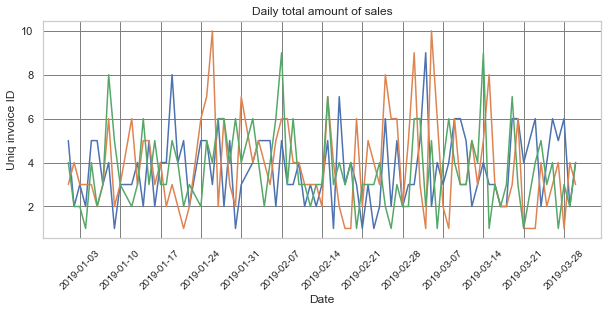

In [1301]:

fig, ax = plt.subplots()
ax.set_title('Daily total amount of sales')
ax.set_ylabel('Uniq invoice ID')
ax.set_xlabel('Date')
ax.plot(pivot)
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.tick_params(axis = 'x',    
               labelsize = 10,  
               labelrotation = 45)   
ax.grid(which='major',
        color = 'grey')
fig.set_figwidth(10,6)
plt.show()

## Кажется, на этом графике сложно что-то понять. 
Выведите динамику по каждой из ветвей на отдельный график.  
Максимально просто это сделать передав значение параметра `subplots=True` в функцию `plot()`.  
Задайте размер фигуры (10,10).

array([<AxesSubplot:xlabel='Date', ylabel='Uniq invoice ID'>,
       <AxesSubplot:xlabel='Date', ylabel='Uniq invoice ID'>,
       <AxesSubplot:xlabel='Date', ylabel='Uniq invoice ID'>],
      dtype=object)

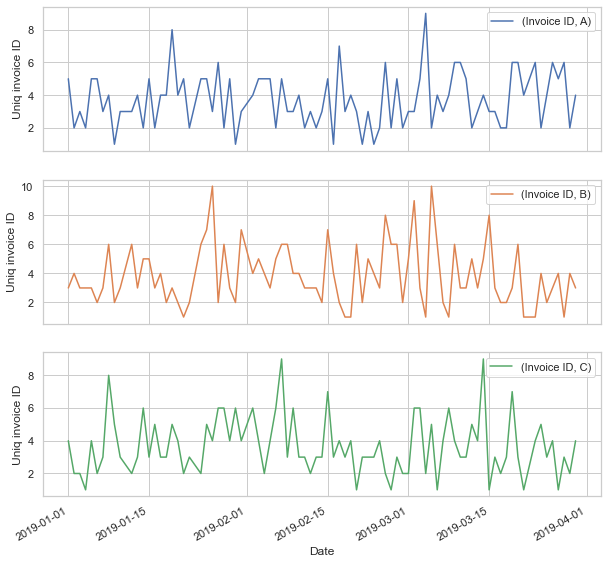

In [1302]:
pivot.plot(subplots=True,figsize=(10,10),ylabel='Uniq invoice ID')


Удобнее было бы наверное смотреть на эти графики, если бы они были сглажены.  
Один из методов сглаживания - скользящее среднее (Moving Average - MA). Суть его в том, что в каждой точке значение равно среднему N предыдущих.  
Для того, чтоб посчитать скользящее среднее мы можем использовать функцию [pandas.DataFrame.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html).     

Используя параметры window=10 и min_periods=1 выведите сглаженные подневные графики количества продаж по ветвям. 

array([<AxesSubplot:xlabel='Date', ylabel='Uniq invoice ID'>,
       <AxesSubplot:xlabel='Date', ylabel='Uniq invoice ID'>,
       <AxesSubplot:xlabel='Date', ylabel='Uniq invoice ID'>],
      dtype=object)

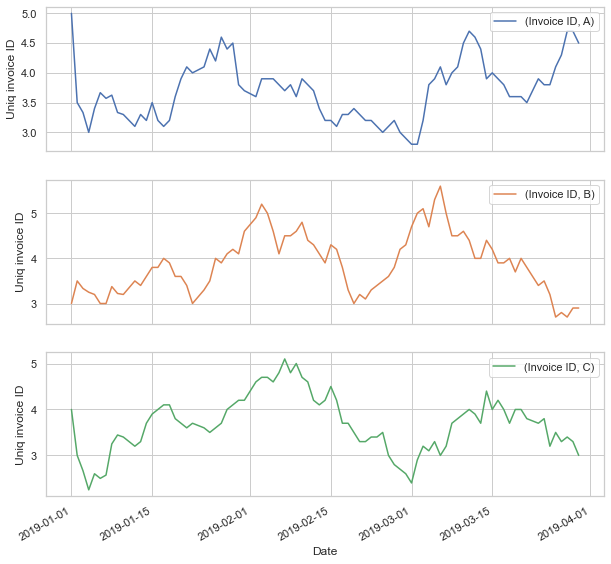

In [1303]:
pivot_roll = pivot.rolling(window=10, min_periods=1).mean()
pivot_roll.plot(subplots=True,figsize=(10,10),ylabel='Uniq invoice ID')

11. В каком городе расположена каждая из ветвей?

In [1304]:
df.groupby('Branch')['City'].unique()

Branch
A       [Yangon]
B     [Mandalay]
C    [Naypyitaw]
Name: City, dtype: object

12. В каком городе прдепочитают пользоваться для расчётов наличкой (`Cash`), а в каком - электронным кошельком (`Ewallet`)?  
Для выполнения этого задания сначала сформируйте таблицу, в которой строкам соответствуют способы оплаты (`City`), в столбцах - `Payment`, значения - количество покупок (они же - продажи).

Нас интересует процент покупок, сделанных каждым из способов. Потому после того, как таблица сформирована, нам надо разделить каждую колонку на сумму значений в ней. Это будет просто `DataFrame.sum()`.
В конце необходимо "разукрасить" таблицу, чтоб найти наибольшее и наименьшее значение по колонкам `Cash` и `Ewallet` соответственно.

In [1305]:
pivot_payment = df.pivot_table(index=['Payment'], columns=['City'],values = ['Invoice ID'], aggfunc='nunique')
pivot_p = round(100*(pivot_payment/pivot_payment.sum()),1)
#pivot_p.drop('Invoice ID')
pivot_p

Invoice ID                 
City          Mandalay Naypyitaw Yangon
Payment                                
Cash              33.1      37.8   32.4
Credit card       32.8      29.9   30.6
Ewallet           34.0      32.3   37.1

In [1306]:
def highlight_min(v, props=''):
    return np.where(v == np.nanmin(v.values), props, '')
s2 = pivot_p.style.apply(highlight_min, props='color:white;background-color:red', axis=1)

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

s2.apply(highlight_max, props='color:white;background-color:green', axis=1)

или

In [1307]:
pivot_p.style.background_gradient(cmap='RdYlGn', axis=1)

13. Посмотрим на распределение цен на товары. Выведите распределение цен в каждой из товарных групп на графике. В какой группе товаров больше всего дорогих товаров (от 90 до 100 у.е.)?

В ходе выполнения задания необходимо построить гистограмму распределения цен на товары в каждой группе. Возможно, будет удобно вывести все гистограммы на однйо фигуре, но можно и на разных.

In [1308]:
df1 = df[['Product line','Unit price']]
pivot_product = df.pivot_table(columns=['Product line'], index=df.index ,values = ['Unit price'], aggfunc=lambda x: x.unique()) 
pivot_product

Unit price                                         \
Product line Electronic accessories Fashion accessories Food and beverages   
0                               NaN                 NaN                NaN   
1                             15.28                 NaN                NaN   
2                               NaN                 NaN                NaN   
3                               NaN                 NaN                NaN   
4                               NaN                 NaN                NaN   
..                              ...                 ...                ...   
995                             NaN                 NaN                NaN   
996                             NaN                 NaN                NaN   
997                             NaN                 NaN              31.84   
998                             NaN                 NaN                NaN   
999                             NaN               88.34                NaN   

                                                                     
Product line Health and beauty Home and lifestyle Sports and travel  
0                        74.69                NaN               NaN  
1                          NaN                NaN               NaN  
2                          NaN              46.33               NaN  
3                        58.22                NaN               NaN  
4                          NaN                NaN             86.31  
..                         ...                ...               ...  
995                      40.35                NaN               NaN  
996                        NaN              97.38               NaN  
997                        NaN                NaN               NaN  
998                        NaN              65.82               NaN  
999                        NaN                NaN               NaN  

[1000 rows x 6 columns]

In [1309]:
#pivot_product = df.pivot_table(columns=['Product line'], index=['Unit price'],values = ['Invoice ID'], aggfunc='nunique')

In [1310]:

pivot_product_ea = pivot_product['Unit price']['Electronic accessories'].dropna()
pivot_product_fa = pivot_product['Unit price']['Fashion accessories'].dropna()
pivot_product_hb = pivot_product['Unit price']['Health and beauty'].dropna()
pivot_product_fb = pivot_product['Unit price']['Food and beverages'].dropna()
pivot_product_st = pivot_product['Unit price']['Sports and travel'].dropna()
pivot_product_hl = pivot_product['Unit price']['Home and lifestyle'].dropna() 

In [1311]:
#df_hb = pd.DataFrame(np.histogram(pivot_product_hb.index, bins=9)).T
#df_hb.columns=['count', 'x']

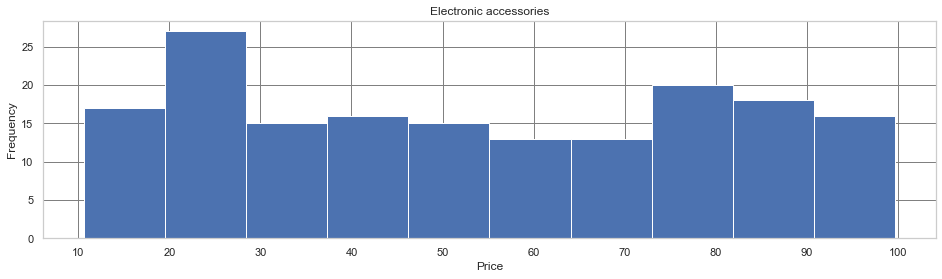

In [1312]:

#plt.hist(pivot_product_ea,set_title = 'Daily total amount of sales');

fig, ax = plt.subplots()
ax.set_title('Electronic accessories')
ax.set_ylabel('Frequency')
ax.set_xlabel('Price')
ax.hist(pivot_product_ea)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

ax.grid(which='major',
        color = 'grey')
fig.set_figwidth(16,6)

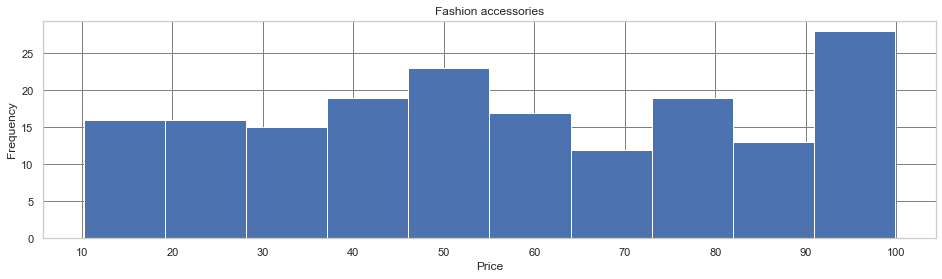

In [1313]:
fig, ax = plt.subplots()
ax.set_title('Fashion accessories')
ax.set_ylabel('Frequency')
ax.set_xlabel('Price')
ax.hist(pivot_product_fa)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

ax.grid(which='major',
        color = 'grey')
fig.set_figwidth(16,6)
#plt.hist(pivot_product_fa)

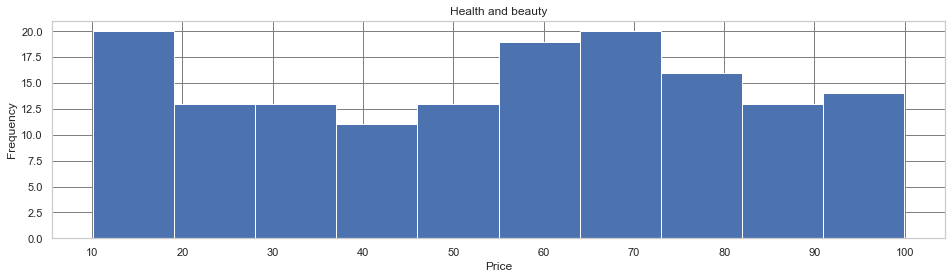

In [1314]:
fig, ax = plt.subplots()
ax.set_title('Health and beauty')
ax.set_ylabel('Frequency')
ax.set_xlabel('Price')
ax.hist(pivot_product_hb)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

ax.grid(which='major',
        color = 'grey')
fig.set_figwidth(16,6)
#plt.hist(pivot_product_hb)

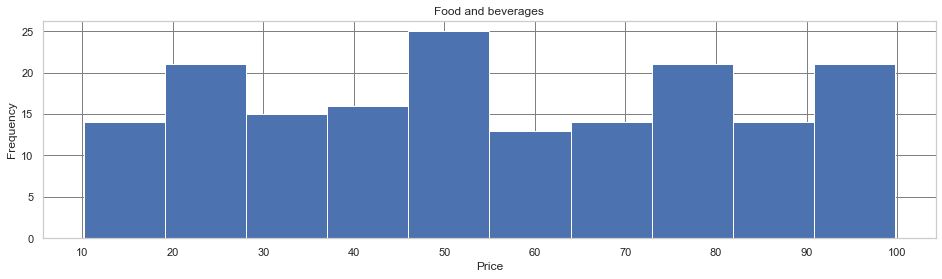

In [1315]:
fig, ax = plt.subplots()
ax.set_title('Food and beverages')
ax.set_ylabel('Frequency')
ax.set_xlabel('Price')
ax.hist(pivot_product_fb)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

ax.grid(which='major',
        color = 'grey')
fig.set_figwidth(16,6)
#plt.hist(pivot_product_hb)

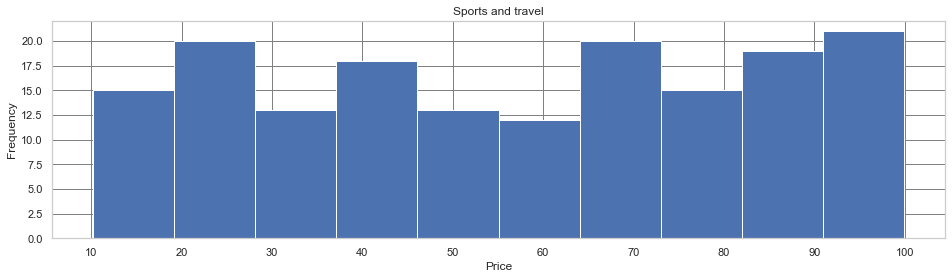

In [1316]:
fig, ax = plt.subplots()
ax.set_title('Sports and travel')
ax.set_ylabel('Frequency')
ax.set_xlabel('Price')
ax.hist(pivot_product_st)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

ax.grid(which='major',
        color = 'grey')
fig.set_figwidth(16,6)
#plt.hist(pivot_product_st)

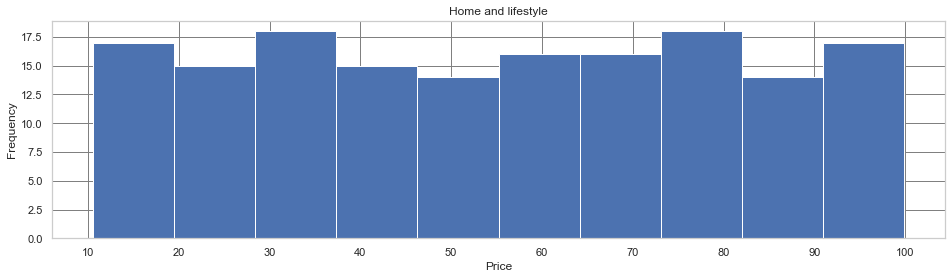

In [1317]:
fig, ax = plt.subplots()
ax.set_title('Home and lifestyle')
ax.set_ylabel('Frequency')
ax.set_xlabel('Price')
ax.hist(pivot_product_hl)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

ax.grid(which='major',
        color = 'grey')
fig.set_figwidth(16,6)
#plt.hist(pivot_product_hl)

В группе Fashion accessories товаров больше всего дорогих товаров (от 90 до 100 у.е.)

14. Есть ли зависимость между ценой и рейтингом товаров группы "Health and beauty" ? Чтобы выяснить - отобразите график рассеянИя и выведите коэффициент корреляции.

Если не видим линейных зависимостей на графике рассеянИя, значит зависимости нет.  
Если коэффициент корреляции меньше 0.2 - значит зависимости нет.

In [1365]:

df1 = df[['Product line','Unit price','Rating']].sort_values(by=['Unit price'])
df2 = df1[df1['Product line']=='Health and beauty']

x = df2['Unit price']
y = df2['Rating']

#pd.DataFrame(np.array([x,y]).T).plot.scatter(0, 1, s=12, grid=True)
plt.show()
#plt.plot(x, y, color='blue')

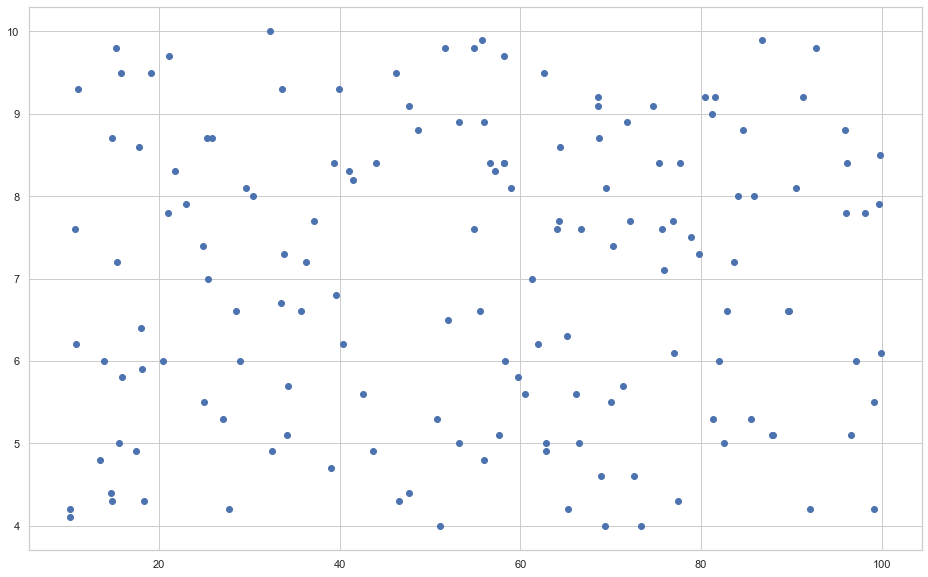

In [1366]:
fig, axes = plt.subplots(figsize=(16, 10), sharey=True)
plt.scatter(x, y);

In [1320]:
df2['Unit price'].corr(df2['Rating'])

0.05183550107702269

Коэффициент корреляции гораздо меньше 0.2, соответственно какой-либо закономерности нет

15*. Опциональное, но желательное задание.   
Постройте все графики, фигурирующие в заданиях, с помощью seaborn.

## Линейные графики

<AxesSubplot:xlabel='Date', ylabel='Total'>

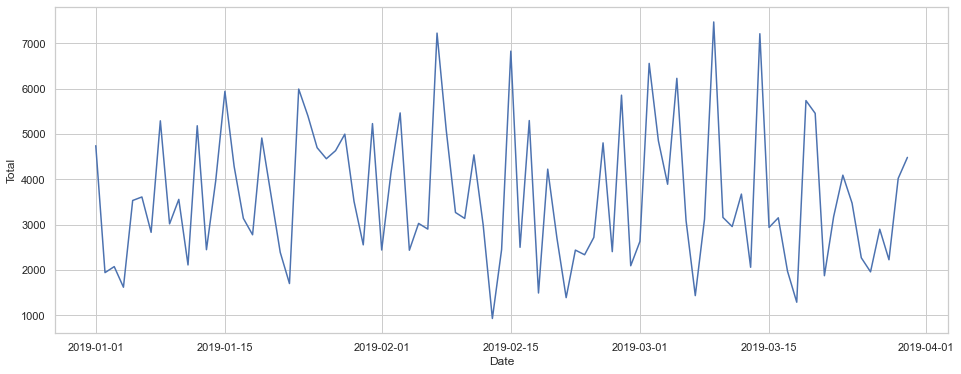

In [1321]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="whitegrid")
sns.lineplot(data=df.groupby('Date')['Total'].sum())


<AxesSubplot:xlabel='Date'>

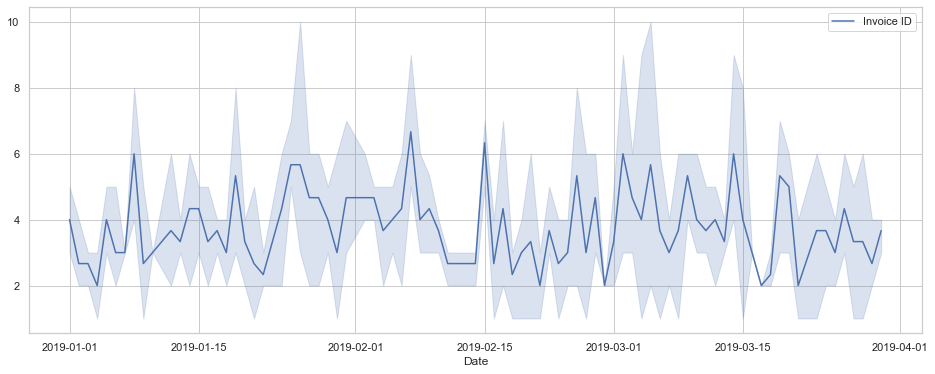

In [1322]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=pivot)

<AxesSubplot:xlabel='Date', ylabel='C'>

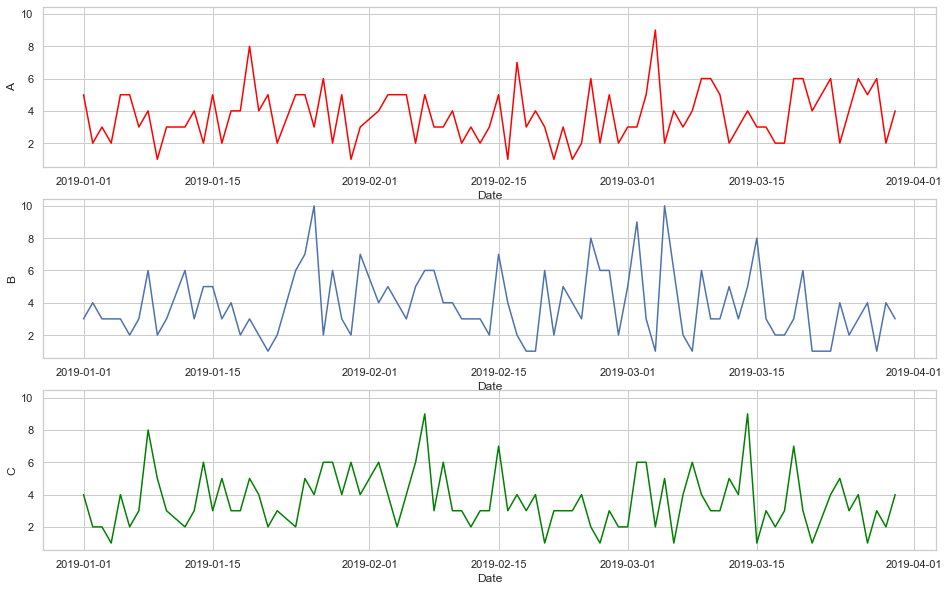

In [1359]:
fig, axes = plt.subplots(3, 1, figsize=(16, 10), sharey=True)

sns.lineplot(ax=axes[0],data =pivot['Invoice ID']['A'],color="red")
sns.lineplot(ax=axes[1],data =pivot['Invoice ID']['B'])
sns.lineplot(ax=axes[2],data =pivot['Invoice ID']['C'],color="green")

<AxesSubplot:xlabel='Date', ylabel='C'>

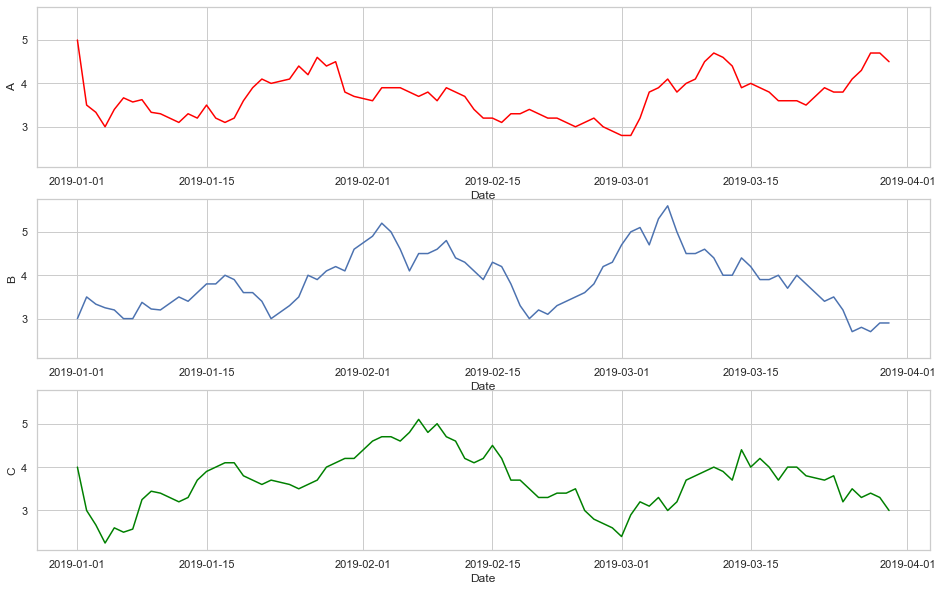

In [1360]:
fig, axes = plt.subplots(3, 1, figsize=(16, 10), sharey=True)

sns.lineplot(ax=axes[0],data =pivot_roll['Invoice ID']['A'],color="red")
sns.lineplot(ax=axes[1],data =pivot_roll['Invoice ID']['B'])
sns.lineplot(ax=axes[2],data =pivot_roll['Invoice ID']['C'],color="green")

## Гистограммы

<AxesSubplot:xlabel='Electronic accessories', ylabel='Count'>

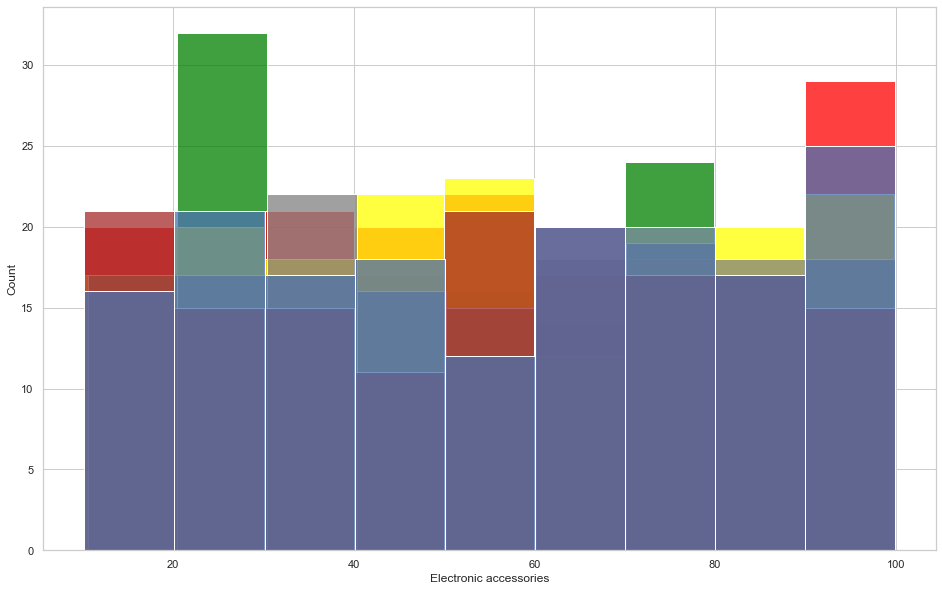

In [1362]:
import seaborn as sns
fig, axes = plt.subplots(figsize=(16, 10), sharey=True)
sns.histplot(pivot_product_ea,color = 'green')
sns.histplot(pivot_product_fa,color = 'red')
sns.histplot(pivot_product_fb,color = 'yellow')
sns.histplot(pivot_product_hl,color = 'grey')
sns.histplot(pivot_product_hb,color = 'brown')
sns.histplot(pivot_product_st)

## Графики рассеивания 

<AxesSubplot:xlabel='Unit price', ylabel='Rating'>

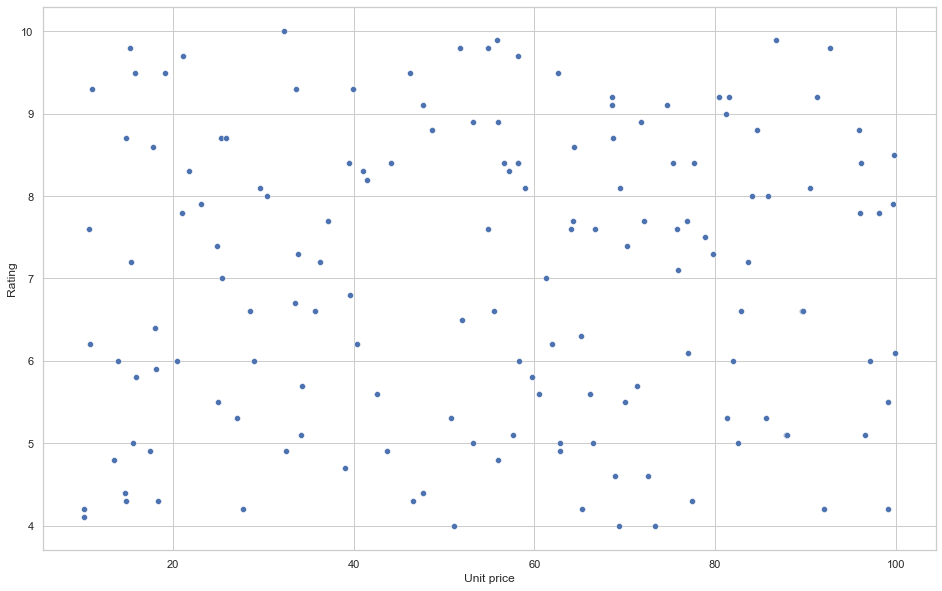

In [1363]:
fig, axes = plt.subplots(figsize=(16, 10), sharey=True)
sns.scatterplot( x=x, y=y)